In [75]:
import numpy as np

In [76]:
import pandas as pd

In [77]:
import matplotlib.pyplot as plt

In [78]:
import seaborn as sns

### 1. Reading the dataset

In [79]:
data=pd.read_csv(r"C:\Users\tessl\Downloads\titanic_dataset.csv")

In [80]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Replacing index values with PassengerId Column

In [81]:
data.set_index("PassengerId", inplace=True)

In [82]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 3. Getting the basic details about the dataset

In [87]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### Displaying the null values in various columns

In [89]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### 4. Fill in all the missing values present in all the columns in the dataset

In [143]:
data['Cabin'].fillna(method ='ffill', inplace = True)

In [144]:
data['Embarked'].fillna(method ='ffill', inplace = True)

In [146]:
data['Age'].fillna(method ='ffill', inplace = True)

In [147]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset


##### 1.Handling outliers in the column Age

Text(0.5, 1.0, 'Box plot for Age')

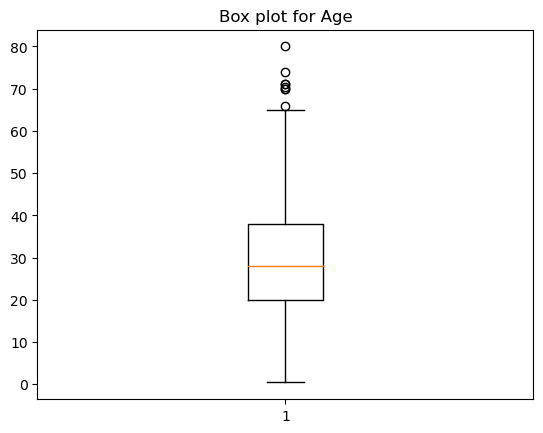

In [152]:
plt.boxplot(data['Age']) #Create Box plot to get a visual idea of outliers
plt.title('Box plot for Age')

In [154]:
Q1 = np.percentile(data['Age'],25)  # Finding both Quatile 1 and Quartile 3 for finding the Inter Quatile Range

In [155]:
Q3 = np.percentile(data['Age'],75)

In [156]:
Q1

20.0

In [157]:
Q3

38.0

In [158]:
IQR=Q3-Q1 # Formula for interquatile Range

In [159]:
IQR

18.0

In [160]:
low_limit= Q1-1.5*IQR  # Finding lower and upper limits
upr_limit= Q3+1.5*IQR

In [161]:
low_limit

-7.0

In [162]:
upr_limit

65.0

In [164]:
outlier = [] #Finding the outliers using the for loop
for x in data['Age']:
    if ((x>upr_limit)or(x<low_limit)):
        outlier.append(x)

In [165]:
outlier

[66.0, 71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0]

In [166]:
ind = data['Age']>upr_limit  # Locating the outliers to the index
data.loc[ind].index

Int64Index([34, 97, 117, 494, 631, 673, 746, 852], dtype='int64', name='PassengerId')

In [168]:
data.drop([34, 97, 117, 494, 631, 673, 746, 852],inplace=True) #Dropping the outliers

In [170]:
data.shape #Number of columns reduced

(883, 11)

#### 2. Handling Outliers in SibSp

Text(0.5, 1.0, 'Box plot for SibSp')

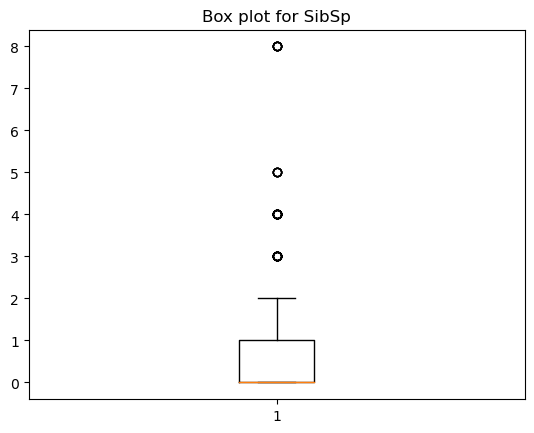

In [199]:
plt.boxplot(data['SibSp']) #Create Box plot to get a visual idea of outliers
plt.title('Box plot for SibSp')

In [200]:
Q1 = np.percentile(data['SibSp'],25)  # Finding both Quatile 1 and Quartile 3 for finding the Inter Quatile Range

In [201]:
Q3 = np.percentile(data['SibSp'],75)

In [202]:
Q1

0.0

In [203]:
Q3

1.0

In [204]:
IQR=Q3-Q1

In [205]:
IQR

1.0

In [206]:
low_limit= Q1-1.5*IQR  # Finding lower and upper limits
upr_limit= Q3+1.5*IQR

In [207]:
low_limit

-1.5

In [208]:
upr_limit

2.5

In [209]:
outlier = [] #Finding the outliers using the for loop
for x in data['SibSp']:
    if ((x>upr_limit)or(x<low_limit)):
        outlier.append(x)

In [210]:
outlier

[3,
 4,
 3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 4,
 8,
 4,
 8]

In [211]:
ind = data['SibSp']>upr_limit  # Locating the outliers to the index
data.loc[ind].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [212]:
data.drop([8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True) #Dropping the outliers

In [213]:
data.shape

(837, 11)

#### 3. Handling Outliers in Fare

Text(0.5, 1.0, 'Box plot for Fare')

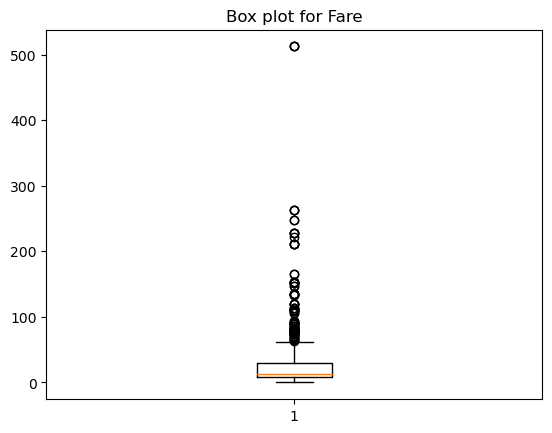

In [220]:
plt.boxplot(data['Fare']) #Create Box plot to get a visual idea of outliers
plt.title('Box plot for Fare')

In [221]:
Q1 = np.percentile(data['Fare'],25)  # Finding both Quatile 1 and Quartile 3 for finding the Inter Quatile Range

In [222]:
Q3 = np.percentile(data['Fare'],75)

In [223]:
Q1

7.8958

In [224]:
Q3

29.7

In [225]:
IQR=Q3-Q1

In [226]:
IQR

21.804199999999998

In [227]:
low_limit= Q1-1.5*IQR  # Finding lower and upper limits
upr_limit= Q3+1.5*IQR

In [228]:
low_limit

-24.810499999999998

In [229]:
upr_limit

62.4063

In [232]:
outlier = [] #Finding the outliers using the for loop
for x in data['Fare']:
    if ((x>upr_limit)or(x<low_limit)):
        outlier.append(x)

In [233]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 146.5208,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 80.0,
 83.1583,
 89.1042,
 164.8667,
 83.1583]

In [234]:
ind = data['Fare']>upr_limit  # Locating the outliers to the index
data.loc[ind].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  98, 103, 119,
            ...
            766, 780, 790, 803, 821, 830, 836, 850, 857, 880],
           dtype='int64', name='PassengerId', length=108)

In [235]:
data.drop([  2,  32,  35,  53,  62,  63,  73,  98, 103, 119,766, 780, 790, 803, 821, 830, 836, 850, 857, 880],inplace=True) #Dropping the outliers

In [236]:
data.shape

(817, 11)

### 5. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [281]:
data.isna().sum()  #Checking for null values

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [282]:
x = data1.drop('Survived',axis = 1) # Droping the target column

In [283]:
y = data1['Survived'] # Storing the dropped column into y

In [284]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [285]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [286]:
x = x.drop('Name',axis = 1)

In [287]:
x = x.drop('Sex',axis = 1)

In [288]:
x = x.drop('Ticket',axis = 1)

In [289]:
x = x.drop('Cabin',axis = 1)

In [290]:
x = x.drop('Embarked',axis = 1)

In [291]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [292]:
from sklearn.preprocessing import MinMaxScaler #using Min Max scaler
min_max =MinMaxScaler(feature_range =(0,1))
x = min_max.fit_transform(x)

In [293]:
type(x)

numpy.ndarray

In [295]:
x=pd.DataFrame(x)

In [297]:
type(x)

pandas.core.frame.DataFrame

In [298]:
x.describe()

,0,1,2,3,4,5
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.500000,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.289162,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.500000,0.247612,0.000000,0.000000,0.015440
50%,0.500000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,0.750000,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
